In [19]:
# Dependencies
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longtitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join(".", "output_data","cities.csv")

# Rnage of latitudes and longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
!pip install citipy

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
api_key

'f98b51a8391033348975509bff98a363'

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) >= 500:
    print("We are good")
else:
    print("We need more data")

We are good


## Perform API Calls

In [23]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

In [24]:
# Create empty lists to store data
city_name = []
country = []
latitude = []
longtitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Get relevant data for each city; use tqdm to track the progress
for city in cities:
    url = base_url + city
    
    # to handle the unavailable data
    try:
        weather_data = requests.get(url).json()
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        latitude.append(weather_data["coord"]["lat"])
        longtitude.append(weather_data["coord"]["lon"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])

    except:
        pass
    
# Confirm we have sufficient data
if len(latitude) >= 500:
    print("We are good")
else:
    print("We need more data")

We are good


In [25]:
# Make Dataframes for the data
weather_df = pd.DataFrame({"City": city_name,
                           "Country": country,
                           "Latitude": latitude,
                           "Longtitude": longtitude,
                           "Time of Searching": datetime.datetime.now(),
                           "Temperature (F)": temp, 
                           "Humidity (%)": humidity, 
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed
                          })
weather_df.head()

,City,Country,Latitude,Longtitude,Time of Searching,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Saldanha,PT,41.42,-6.55,2018-08-25 20:18:53.843259,57.26,74,0,1.39
1,Kalmunai,LK,7.42,81.82,2018-08-25 20:18:53.843259,73.28,99,80,2.95
2,Albany,US,42.65,-73.75,2018-08-25 20:18:53.843259,69.46,57,75,11.41
3,Umm Lajj,SA,25.02,37.27,2018-08-25 20:18:53.843259,78.50,100,0,4.07
4,Saint-Philippe,CA,45.36,-73.48,2018-08-25 20:18:53.843259,74.28,52,1,8.05


In [26]:
# Output the data to csv
weather_df.to_csv(output_data_file)

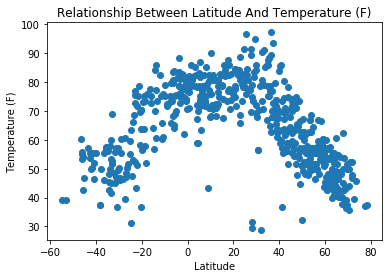

In [27]:
# Plot Temperature (F) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Relationship Between Latitude And Temperature (F)")
fig1 = plt.gcf()
fig1_path = os.path.join(".","output_charts","Relationship Between Latitude And Temperature (F)")
fig1.savefig(fig1_path, dpi=1200)

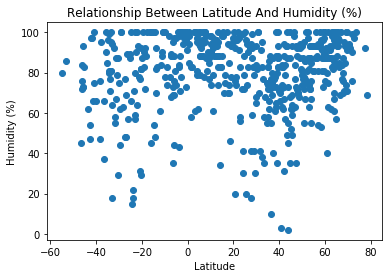

In [28]:
# Plot Humidity (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Relationship Between Latitude And Humidity (%)")
fig2 = plt.gcf()
fig2_path = os.path.join(".","output_charts","Relationship Between Latitude And Humidity (%)")
fig2.savefig(fig2_path, dpi=1200)

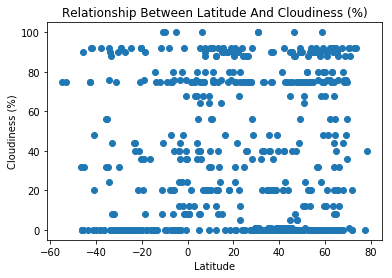

In [29]:
# Plot Cloudiness (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Relationship Between Latitude And Cloudiness (%)")
fig3 = plt.gcf()
fig3_path = os.path.join(".","output_charts","Relationship Between Latitude And Cloudiness (%)")
fig3.savefig(fig3_path, dpi=1200)

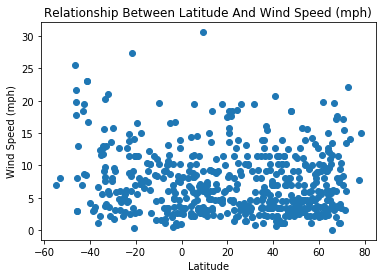

In [30]:
# Plot Wind Speed (mph) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Relationship Between Latitude And Wind Speed (mph)")
fig4 = plt.gcf()
fig4_path = os.path.join(".","output_charts","Relationship Between Latitude And Wind Speed (mph)")
fig4.savefig(fig4_path, dpi=1200)

In [40]:
# Create empty lists to store data
city_name = []
country = []
latitude = []
longtitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
n = 0

# Get relevant data for each city
for city in cities:
    url = base_url + city

    # to handle the unavailable data
    try:
        weather_data = requests.get(url).json()
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        latitude.append(weather_data["coord"]["lat"])
        longtitude.append(weather_data["coord"]["lon"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        n = n + 1
        print(f"city number:{n}, city name: {weather_data['name']}")

    except:
        pass

city number:1, city name: Saldanha
city number:2, city name: Kalmunai
city number:3, city name: Albany
city number:4, city name: Umm Lajj
city number:5, city name: Saint-Philippe
city number:6, city name: Airai
city number:7, city name: Ushuaia
city number:8, city name: Punta Arenas
city number:9, city name: Eureka
city number:10, city name: Saskylakh
city number:11, city name: Beringovskiy
city number:12, city name: Longyearbyen
city number:13, city name: Ilulissat
city number:14, city name: Hobart
city number:15, city name: Yellowknife
city number:16, city name: Bluff
city number:17, city name: Camacha
city number:18, city name: Bredasdorp
city number:19, city name: Hamilton
city number:20, city name: Haines Junction
city number:21, city name: Jamestown
city number:22, city name: Port Alfred
city number:23, city name: Cape Town
city number:24, city name: Faya
city number:25, city name: Mataura
city number:26, city name: Birao
city number:27, city name: Tiksi
city number:28, city name

city number:225, city name: Vanimo
city number:226, city name: Magway
city number:227, city name: Lata
city number:228, city name: Namibe
city number:229, city name: Andujar
city number:230, city name: Soe
city number:231, city name: Aranos
city number:232, city name: Medzilaborce
city number:233, city name: San Quintin
city number:234, city name: Salalah
city number:235, city name: Henties Bay
city number:236, city name: Kyabe
city number:237, city name: Hualmay
city number:238, city name: Ballina
city number:239, city name: Broome
city number:240, city name: Avera
city number:241, city name: Tagusao
city number:242, city name: Cherskiy
city number:243, city name: Miranda
city number:244, city name: Moussoro
city number:245, city name: Fortuna
city number:246, city name: Uvalde
city number:247, city name: Bolobo
city number:248, city name: Mega
city number:249, city name: Yeppoon
city number:250, city name: Am Timan
city number:251, city name: Sitka
city number:252, city name: Kruisfo

city number:447, city name: Vilnius
city number:448, city name: Evensk
city number:449, city name: Patu
city number:450, city name: Port Macquarie
city number:451, city name: Rafraf
city number:452, city name: Bilara
city number:453, city name: Hirara
city number:454, city name: Islahiye
city number:455, city name: Kungsbacka
city number:456, city name: Neftcala
city number:457, city name: Uglovskoye
city number:458, city name: Karaton
city number:459, city name: Khorinsk
city number:460, city name: Rapid Valley
city number:461, city name: Tuy Hoa
city number:462, city name: Gasa
city number:463, city name: Bushehr
city number:464, city name: Kintinku
city number:465, city name: Ust-Omchug
city number:466, city name: Kloulklubed
city number:467, city name: Arica
city number:468, city name: Lunenburg
city number:469, city name: Kholm
city number:470, city name: Batemans Bay
city number:471, city name: Matagami
city number:472, city name: Severo-Yeniseyskiy
city number:473, city name: Sa

In [ ]:
# Analysis:
    # Cities fall in latitude between -20 to 40 have more comfortable tempreture compare to cities in latitude under -20 or over 60. 
    # The differece of latitude doesn't significantly affect the cloudiness.
    # Cities above the equator are more humid thatn cities below the equator. 